In [1]:
from IPython import display
!pip install ultralytics

display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.58 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5771.7/8062.4 GB disk)


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [3]:
try:
    rm -r /content/datasets
except:
    pass

In [4]:
directory = f'{HOME}/datasets'
if not os.path.exists(directory):
    os.makedirs(directory)
    print('Directory created successfully')
else:
    print('Directory already exists')

Directory created successfully


In [5]:
cd {HOME}/datasets

/kaggle/working/datasets


In [6]:
import cv2
import shutil

if os.path.exists('TennisCourtZone'):
    shutil.rmtree('TennisCourtZone')
    print(f"Removed existing directory")

!git clone https://github.com/iramamy/TennisCourtZone.git
print('Repository cloned')

Cloning into 'TennisCourtZone'...
remote: Enumerating objects: 355, done.
remote: Counting objects: 100% (355/355), done.
remote: Compressing objects: 100% (352/352), done.
remote: Total 355 (delta 3), reused 355 (delta 3), pack-reused 0
Receiving objects: 100% (355/355), 15.07 MiB | 34.84 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Repository cloned


In [8]:
from ultralytics import YOLO, solutions
from IPython.display import display, Image

In [9]:
model = YOLO("yolov8x-seg.pt")

100%|██████████| 137M/137M [00:00<00:00, 272MB/s]  


In [10]:
model.train(
    data=f"{HOME}/datasets/TennisCourtZone/data.yaml", 
    epochs=15,
    imgsz=640)

Ultralytics YOLOv8.2.58 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=/kaggle/working/datasets/TennisCourtZone/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

100%|██████████| 755k/755k [00:00<00:00, 13.7MB/s]
2024-07-17 17:33:16,178	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-17 17:33:17,613	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 70.4MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/datasets/TennisCourtZone/Train/labels... 209 images, 0 backgrounds, 0 corrupt: 100%|██████████| 209/209 [00:00<00:00, 851.91it/s]

train: New cache created: /kaggle/working/datasets/TennisCourtZone/Train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/datasets/TennisCourtZone/Valid/labels... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 529.15it/s]

val: New cache created: /kaggle/working/datasets/TennisCourtZone/Valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/15      15.5G      1.202      4.227      2.962      1.573         11        640: 100%|██████████| 14/14 [00:27<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.42s/it]

                   all         60        474      0.721      0.975      0.879      0.739      0.562       0.76      0.648      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/15      15.5G     0.3953      1.137     0.9088     0.9208         26        640: 100%|██████████| 14/14 [00:21<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

                   all         60        474      0.601      0.976      0.705      0.657      0.445      0.766      0.474      0.365



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/15      14.9G     0.3721     0.9635     0.7587     0.9083         23        640: 100%|██████████| 14/14 [00:22<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.50s/it]

                   all         60        474      0.619      0.866      0.774      0.715      0.494      0.737      0.643      0.481



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/15      14.9G     0.3765     0.7583     0.6457     0.9223         13        640: 100%|██████████| 14/14 [00:22<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.45s/it]

                   all         60        474      0.932      0.928      0.987      0.859      0.805      0.801      0.862      0.737



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/15        15G     0.3673     0.6663     0.5809     0.9112         15        640: 100%|██████████| 14/14 [00:22<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.42s/it]

                   all         60        474      0.763      0.955      0.982      0.927      0.707      0.834      0.857      0.763


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/15      3.42G     0.4151     0.5893     0.6291     0.9752          8        640: 100%|██████████| 14/14 [00:22<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]

                   all         60        474      0.586      0.929      0.821      0.678      0.518      0.808      0.708      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/15      14.8G     0.3795     0.3867     0.4763     0.9258          8        640: 100%|██████████| 14/14 [00:20<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.41s/it]

                   all         60        474        0.6      0.651      0.621      0.542      0.537      0.441       0.49      0.429



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/15      4.53G     0.3424     0.3029     0.4031     0.9057          8        640: 100%|██████████| 14/14 [00:20<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.31s/it]

                   all         60        474      0.654      0.875      0.879      0.795      0.559      0.709      0.706      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/15      14.5G     0.3106     0.2789     0.3727     0.8694          8        640: 100%|██████████| 14/14 [00:20<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.41s/it]

                   all         60        474      0.804      0.668      0.823      0.798      0.546      0.682      0.673      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/15      3.55G     0.2934     0.3159     0.3365     0.8842          8        640: 100%|██████████| 14/14 [00:21<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.29s/it]

                   all         60        474       0.97      0.975      0.984      0.948      0.837      0.844      0.847      0.768



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/15      14.9G     0.2637     0.2851     0.2847      0.837          8        640: 100%|██████████| 14/14 [00:20<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.37s/it]

                   all         60        474      0.985          1       0.99      0.964      0.859      0.873      0.863      0.789



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/15      15.5G      0.242      0.266     0.2635     0.8398          8        640: 100%|██████████| 14/14 [00:20<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.39s/it]

                   all         60        474      0.985          1      0.989      0.974      0.894      0.908      0.876      0.811



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/15      14.9G     0.2392     0.2273     0.2539     0.8288          8        640: 100%|██████████| 14/14 [00:20<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.37s/it]

                   all         60        474      0.986          1      0.988      0.981      0.884      0.898      0.868       0.83



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/15      3.53G     0.2394     0.2466     0.2388     0.8249          8        640: 100%|██████████| 14/14 [00:20<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.27s/it]

                   all         60        474      0.986          1      0.988       0.98       0.87      0.883      0.864      0.831



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/15      14.9G     0.1965      0.224     0.2127     0.8172          8        640: 100%|██████████| 14/14 [00:20<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.35s/it]

                   all         60        474      0.986          1      0.989      0.986      0.899      0.912      0.898      0.831



15 epochs completed in 0.117 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 144.0MB
Optimizer stripped from runs/segment/train/weights/best.pt, 144.0MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.2.58 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8x-seg summary (fused): 295 layers, 71,728,360 parameters, 0 gradients, 343.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]


                   all         60        474      0.986          1      0.989      0.986      0.899      0.912      0.898      0.831
      bottom-dead-zone         59         59      0.982          1      0.991       0.99      0.982          1      0.991      0.991
                 court         60         60      0.998          1      0.995      0.995      0.316      0.317      0.288     0.0736
    left-doubles-alley         59         59      0.982          1      0.981      0.978      0.982          1      0.981      0.973
      left-service-box         59         59      0.982          1      0.994      0.994      0.982          1      0.994      0.992
                   net         60         60      0.999          1      0.995      0.972      0.982      0.983      0.974      0.749
   right-doubles-alley         59         59      0.981          1      0.988      0.988      0.981          1      0.988      0.984
     right-service-box         59         59      0.982          1   

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b340216a680>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0

In [11]:
!ls {HOME}/datasets/runs/segment/train/

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


BoxF1_curve.png					  results.csv
BoxPR_curve.png					  results.png
BoxP_curve.png					  train_batch0.jpg
BoxR_curve.png					  train_batch1.jpg
MaskF1_curve.png				  train_batch2.jpg
MaskPR_curve.png				  train_batch70.jpg
MaskP_curve.png					  train_batch71.jpg
MaskR_curve.png					  train_batch72.jpg
args.yaml					  val_batch0_labels.jpg
confusion_matrix.png				  val_batch0_pred.jpg
confusion_matrix_normalized.png			  val_batch1_labels.jpg
events.out.tfevents.1721237617.31899d8fcdd0.34.0  val_batch1_pred.jpg
labels.jpg					  weights
labels_correlogram.jpg


/kaggle/working


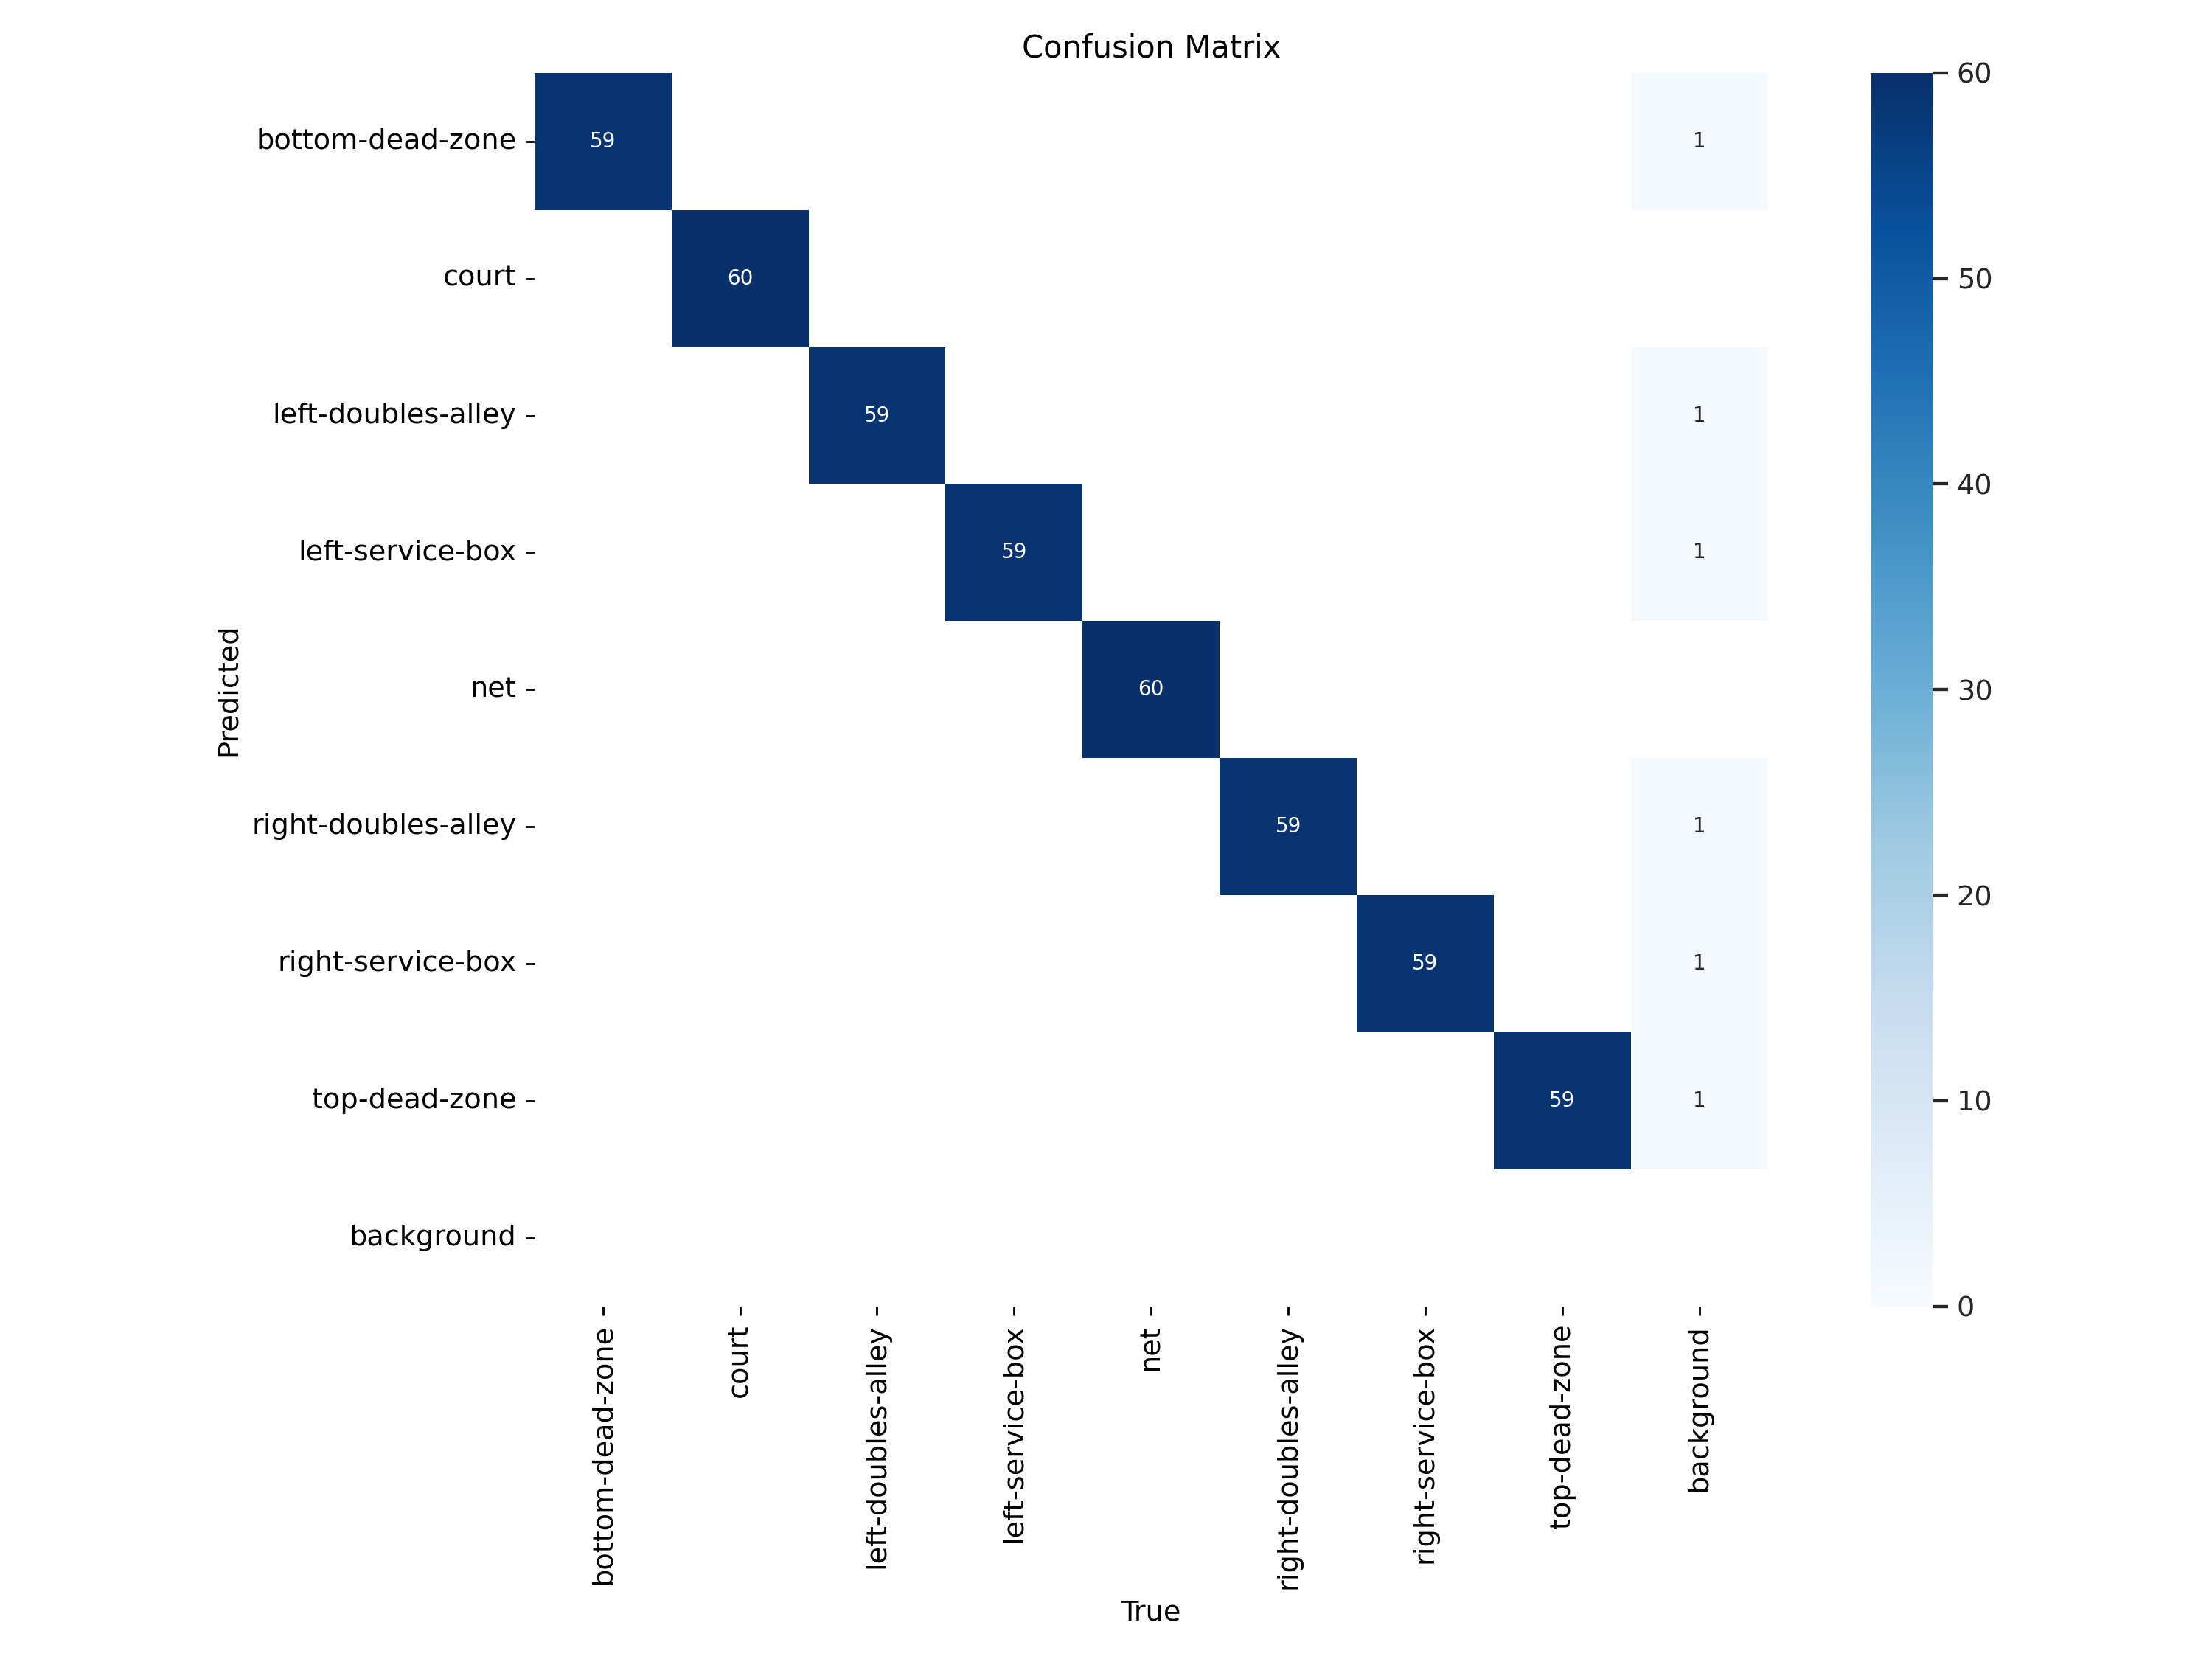

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/segment/train/confusion_matrix.png', width=600)

/kaggle/working


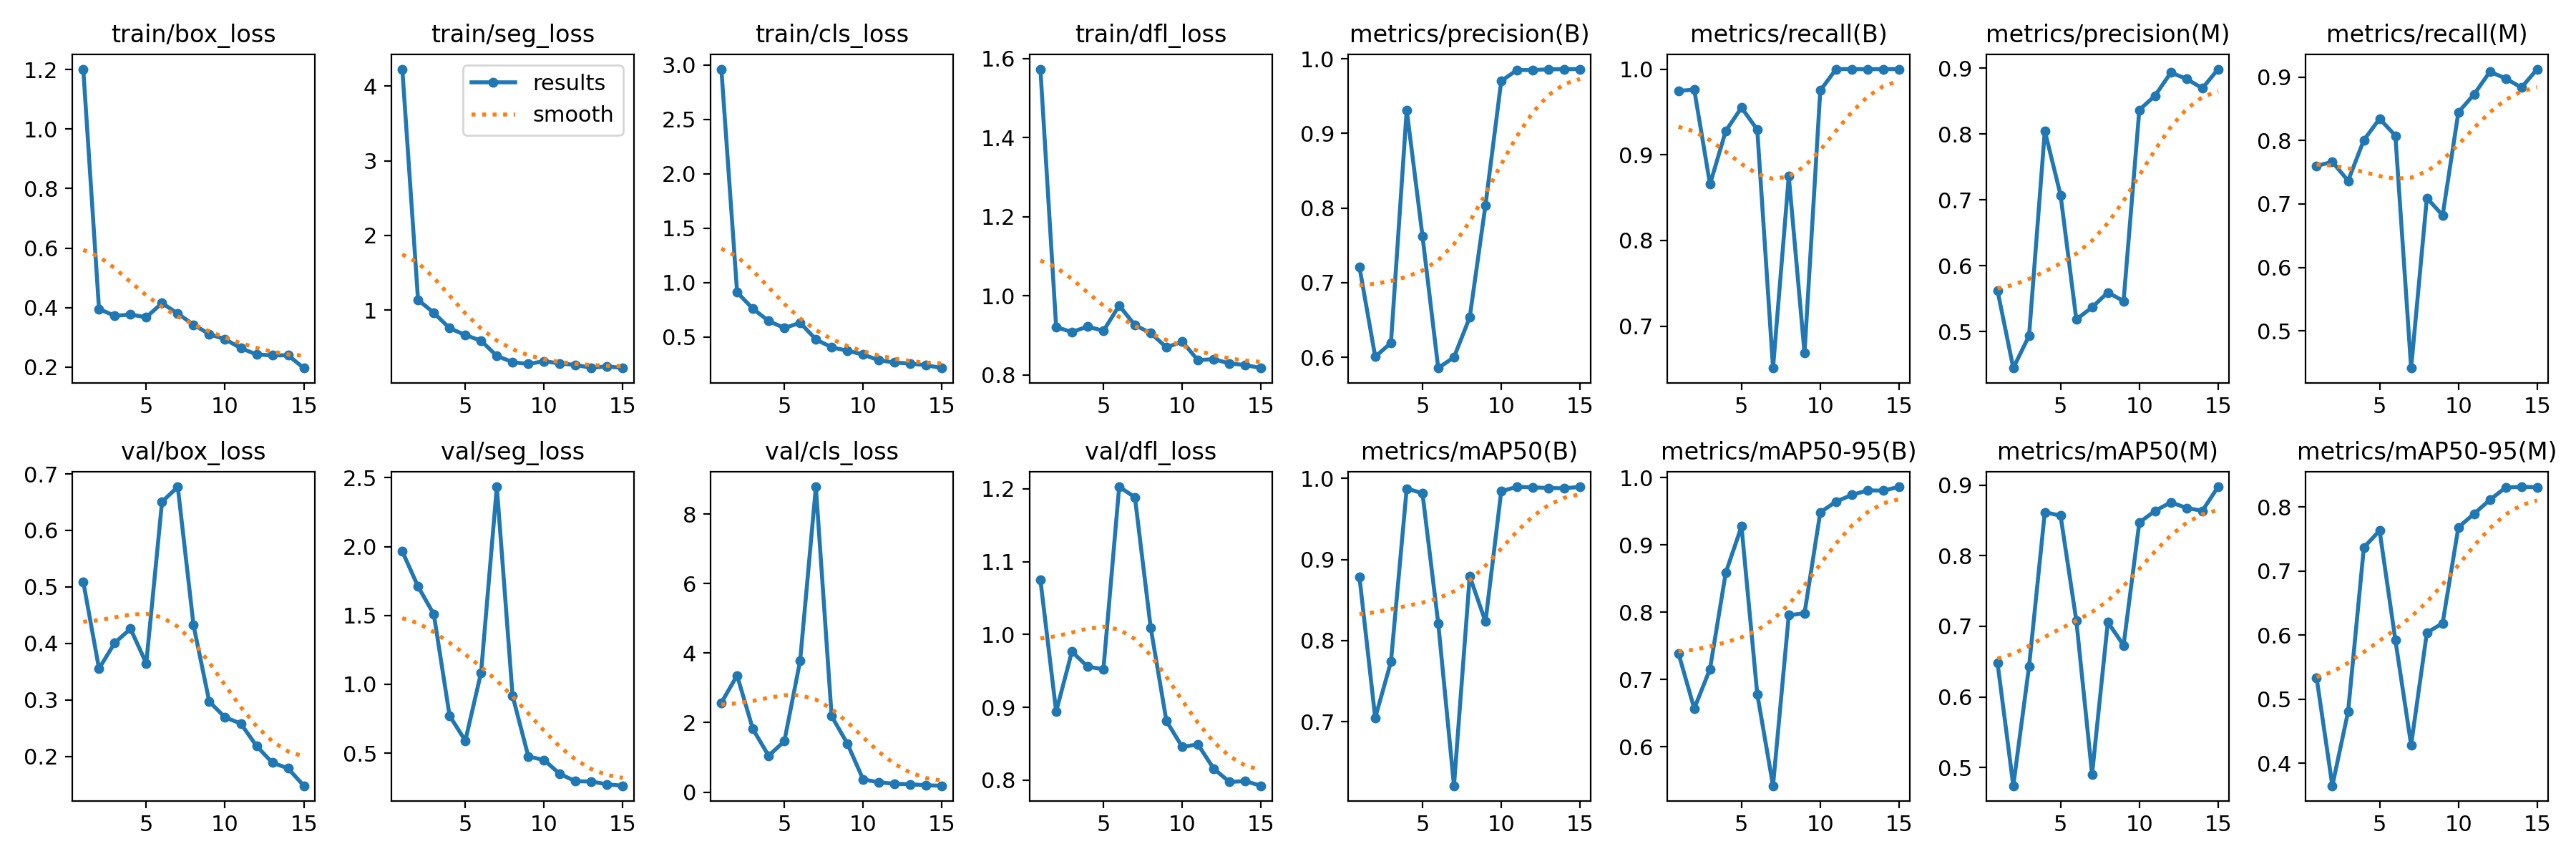

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/segment/train/results.png', width=1600)

In [14]:
%cd {HOME}

val_model = YOLO(f"{HOME}/datasets/runs/segment/train/weights/best.pt")
val_model.val(data=f"{HOME}/datasets/TennisCourtZone/data.yaml")

/kaggle/working
Ultralytics YOLOv8.2.58 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8x-seg summary (fused): 295 layers, 71,728,360 parameters, 0 gradients, 343.7 GFLOPs


val: Scanning /kaggle/working/datasets/TennisCourtZone/Valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.55s/it]


                   all         60        474      0.986          1      0.989      0.986      0.907      0.921      0.903      0.831
      bottom-dead-zone         59         59      0.982          1      0.991       0.99      0.982          1      0.991      0.991
                 court         60         60      0.998          1      0.995      0.995      0.383      0.383      0.327     0.0813
    left-doubles-alley         59         59      0.982          1      0.981      0.979      0.982          1      0.981      0.973
      left-service-box         59         59      0.982          1      0.994      0.994      0.982          1      0.994      0.992
                   net         60         60      0.999          1      0.995      0.977      0.982      0.983      0.974      0.749
   right-doubles-alley         59         59      0.981          1      0.986      0.986      0.981          1      0.986      0.982
     right-service-box         59         59      0.982          1   

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b33f9a8bd60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0

In [15]:
%%capture
%cd {HOME}

pred_model = YOLO(f"{HOME}/datasets/runs/segment/train/weights/best.pt")
pred_model.predict(
    source=f"{HOME}/datasets/TennisCourtZone/Test/images",
    show_conf=False,
    show_labels=False,
    save=True
)


image 1/30 /kaggle/working/datasets/TennisCourtZone/Test/images/0003_jpg.rf.24437df8ad18044d978cfc4435e1726e.jpg: 640x640 1 bottom-dead-zone, 1 court, 1 left-doubles-alley, 1 left-service-box, 1 net, 1 right-doubles-alley, 1 right-service-box, 1 top-dead-zone, 98.6ms
image 2/30 /kaggle/working/datasets/TennisCourtZone/Test/images/0009_jpg.rf.71c533fc68288c72d0623fd45e0f615f.jpg: 640x640 1 bottom-dead-zone, 1 court, 1 left-doubles-alley, 1 left-service-box, 1 net, 1 right-doubles-alley, 1 right-service-box, 1 top-dead-zone, 78.4ms
image 3/30 /kaggle/working/datasets/TennisCourtZone/Test/images/0013_jpg.rf.fc8adb708209893cb1b1afedf890f2f3.jpg: 640x640 1 bottom-dead-zone, 1 court, 1 left-doubles-alley, 1 left-service-box, 1 net, 1 right-doubles-alley, 1 right-service-box, 1 top-dead-zone, 82.0ms
image 4/30 /kaggle/working/datasets/TennisCourtZone/Test/images/0023_jpg.rf.a8a1fcbc9e9a6381d9e3784aef1e13a6.jpg: 640x640 1 bottom-dead-zone, 1 court, 1 left-doubles-alley, 1 left-service-box, 1 

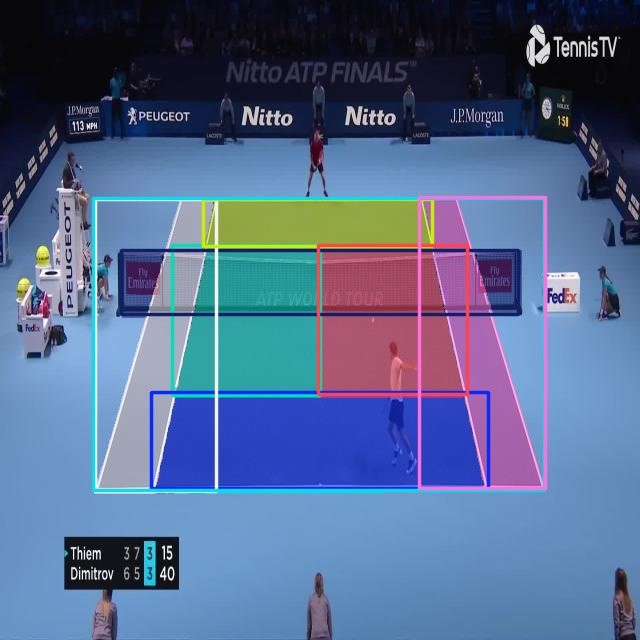

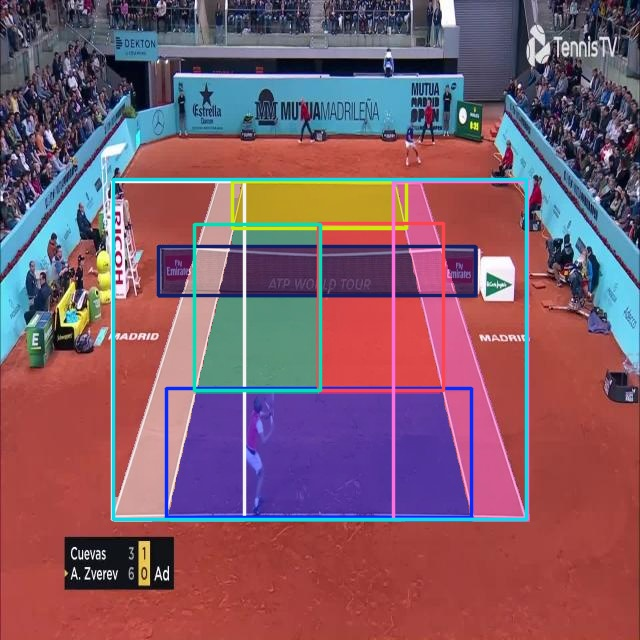

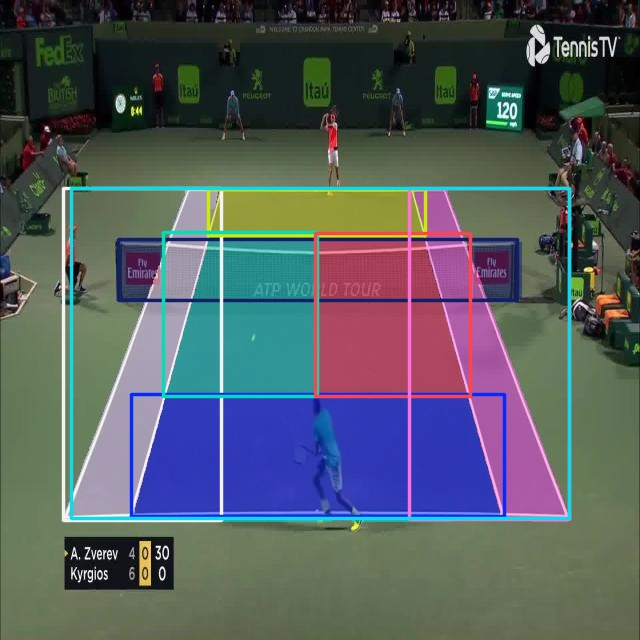

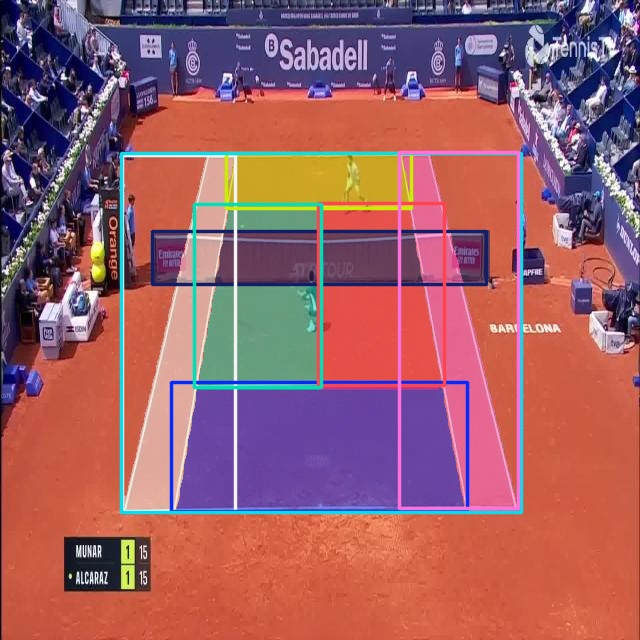

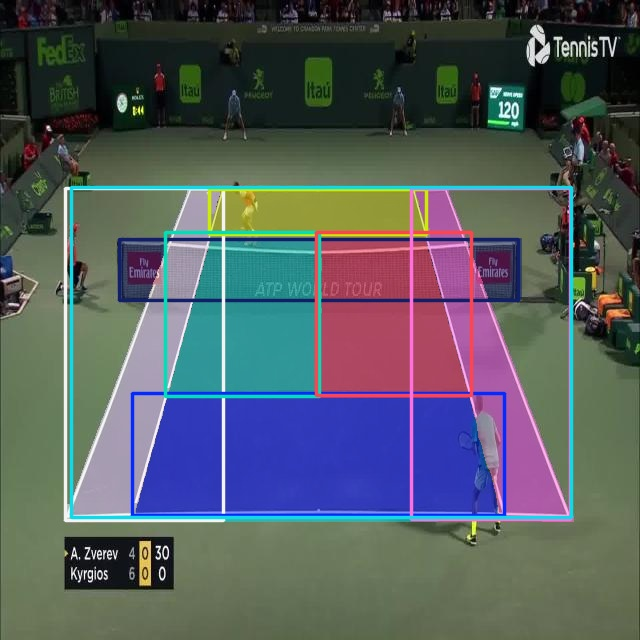

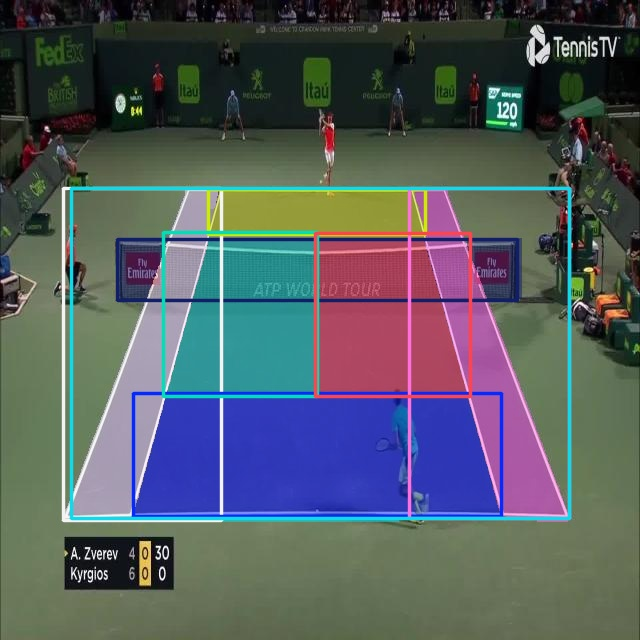

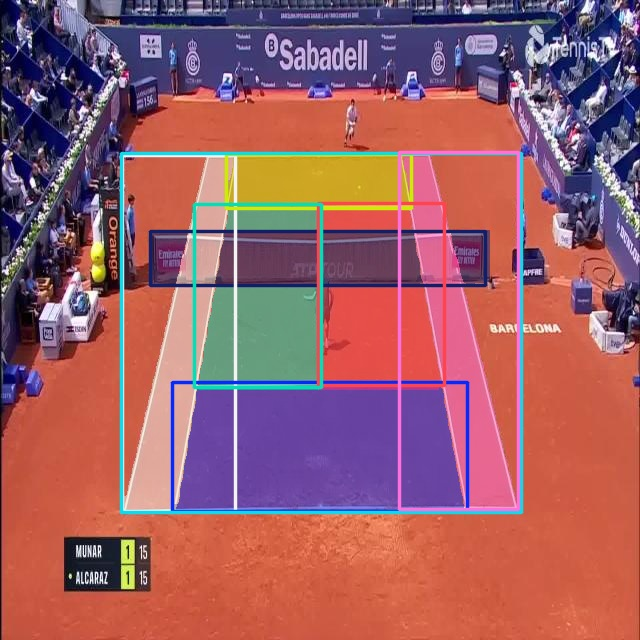

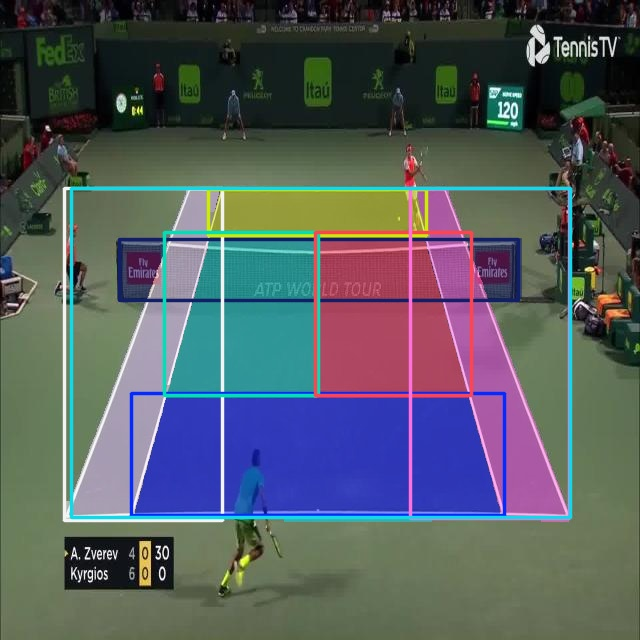

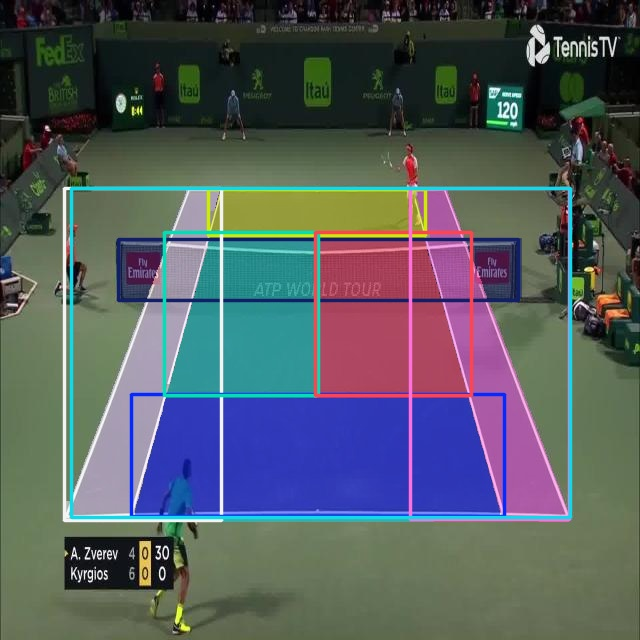

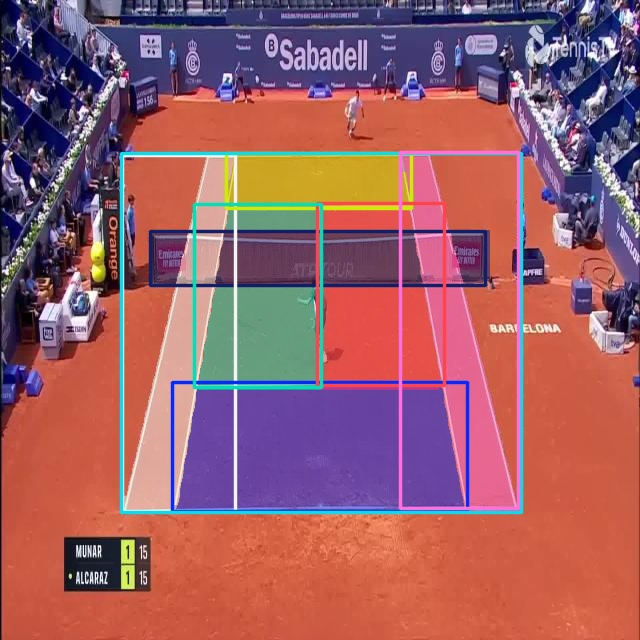

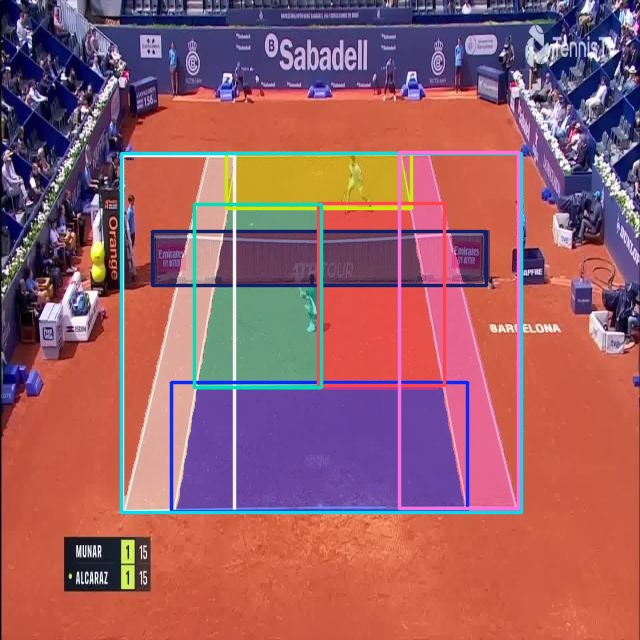

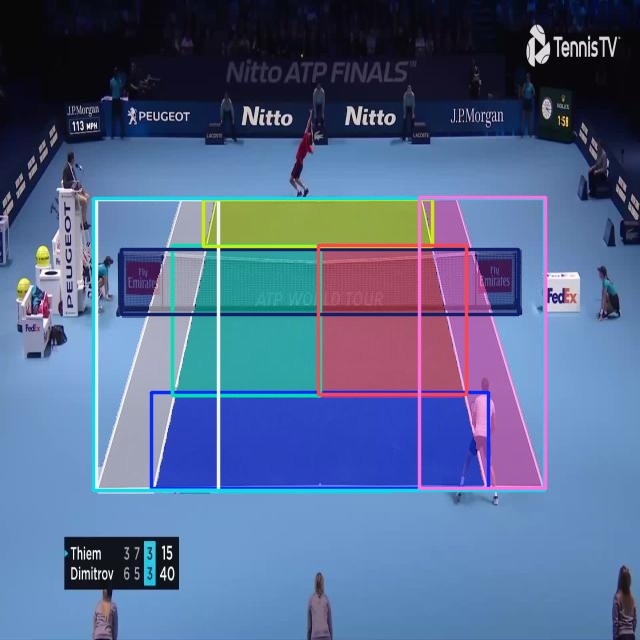

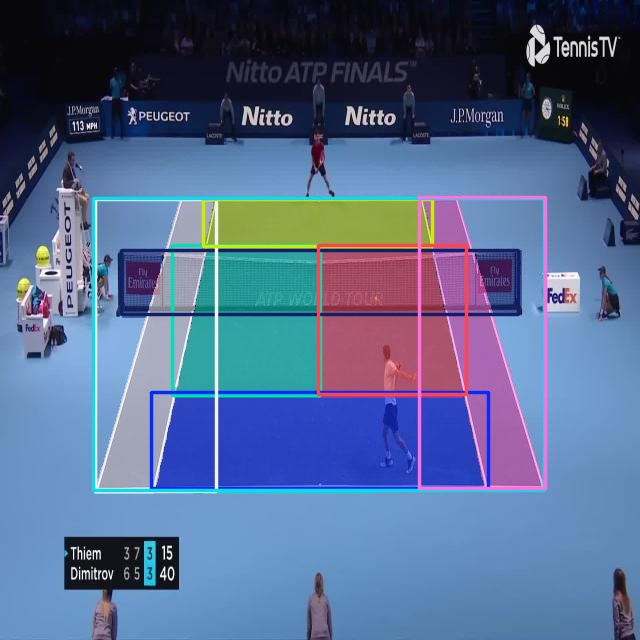

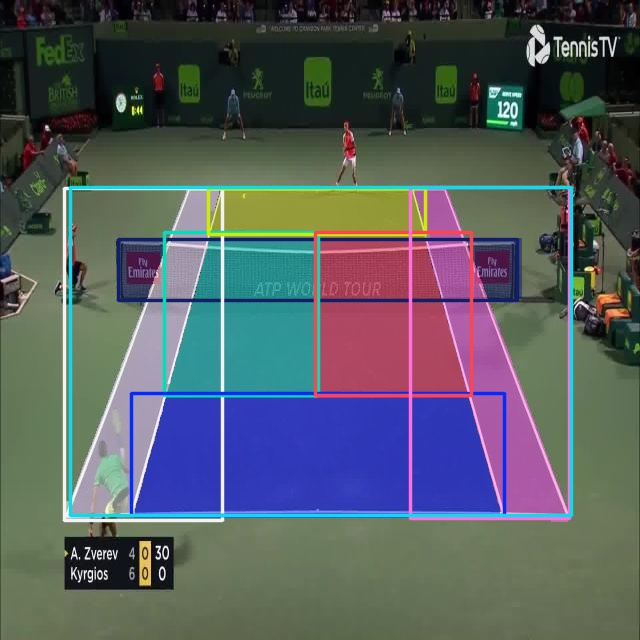

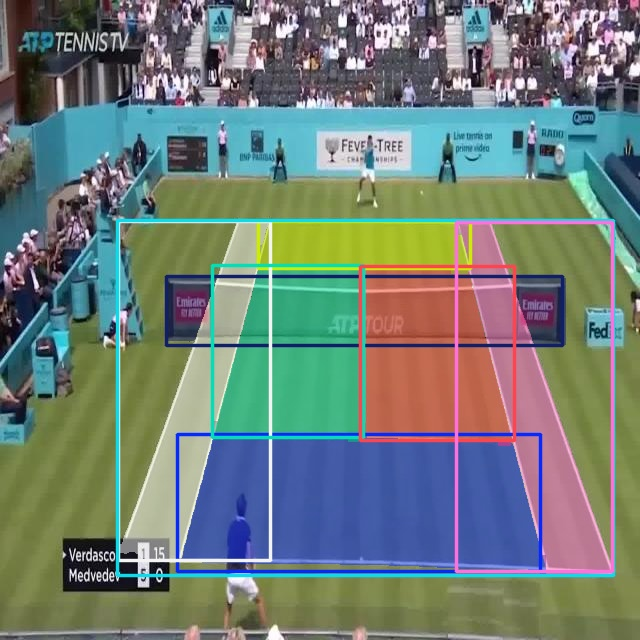

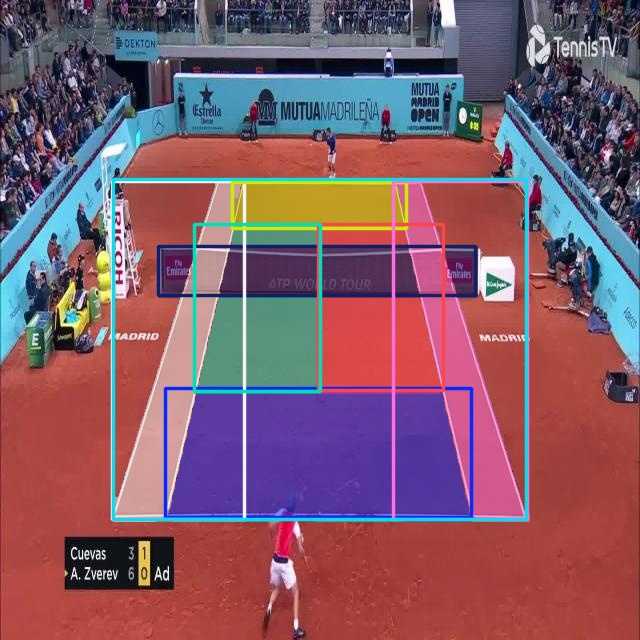

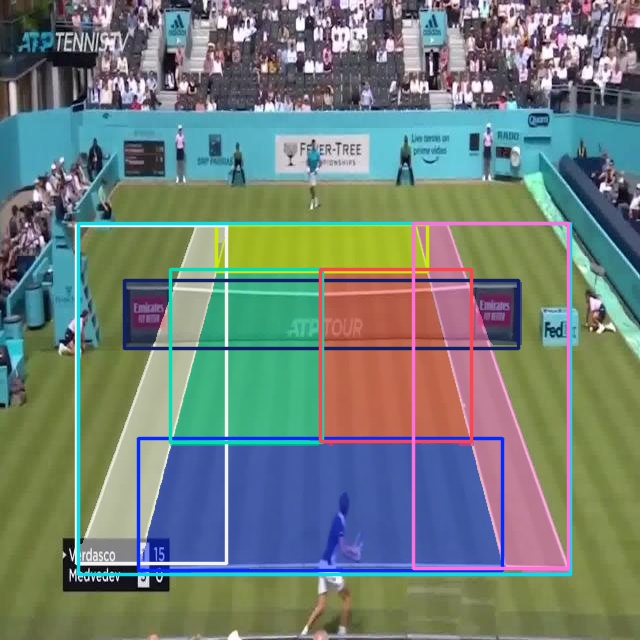

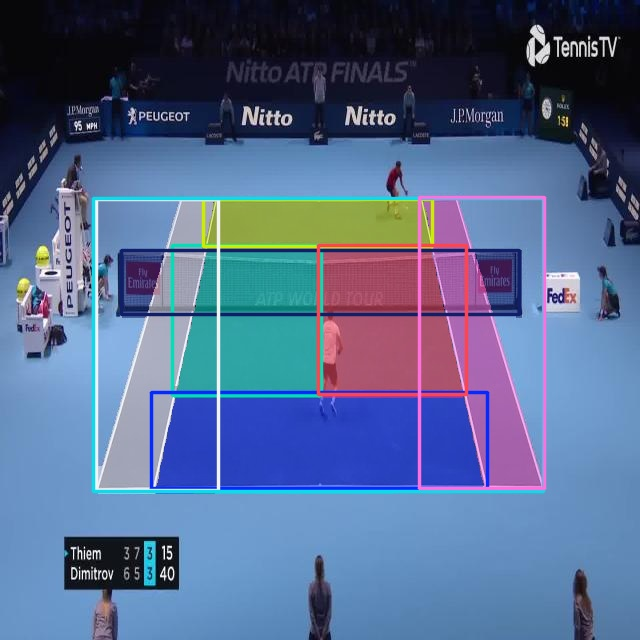

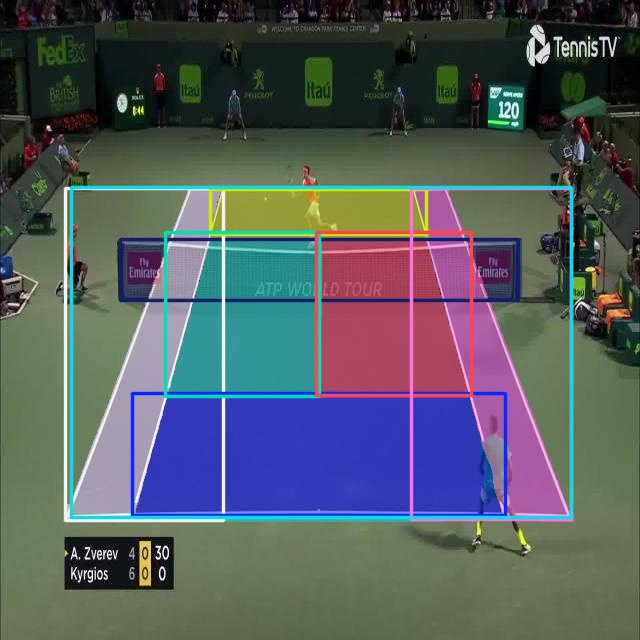

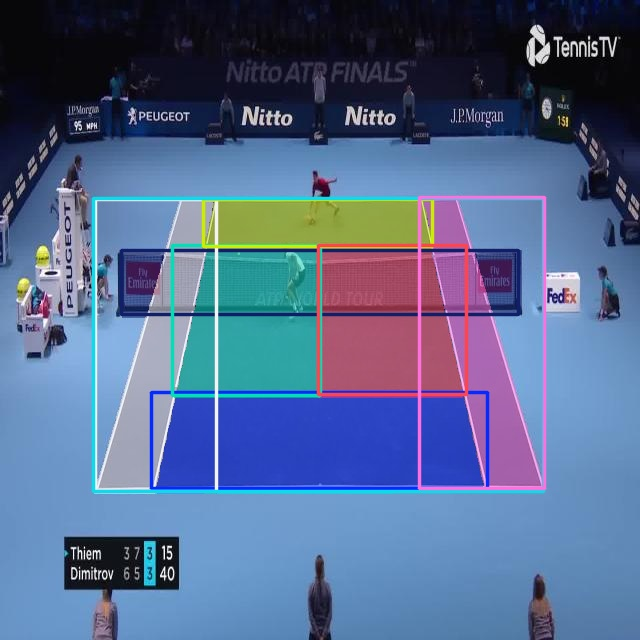

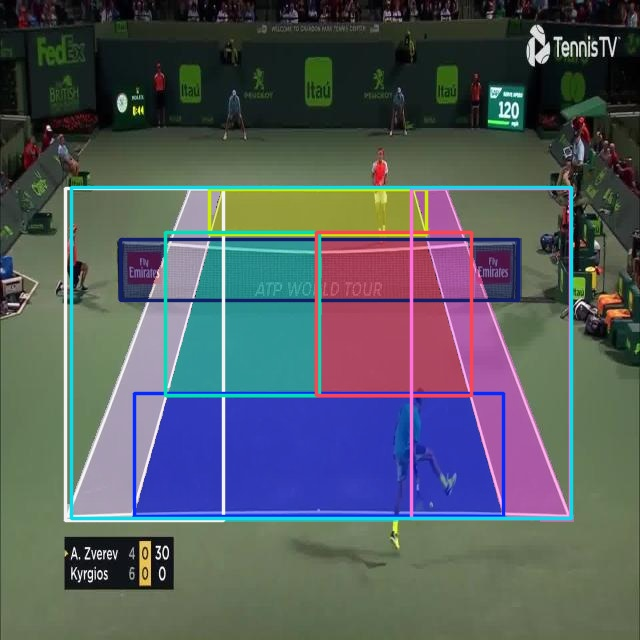

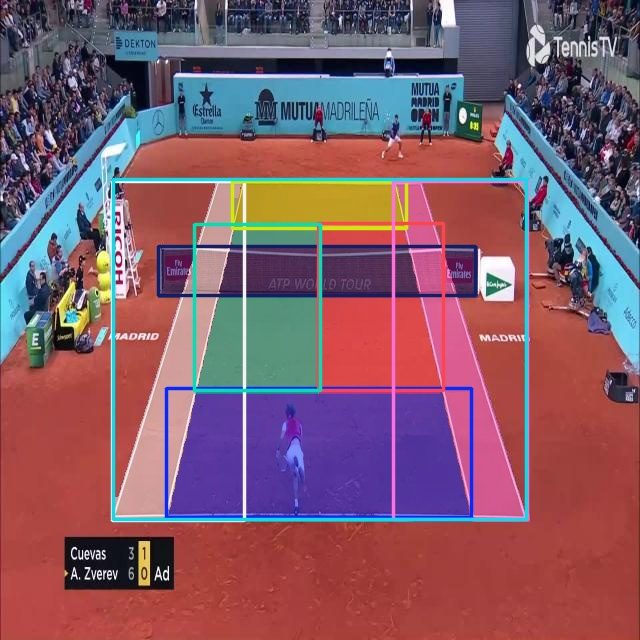

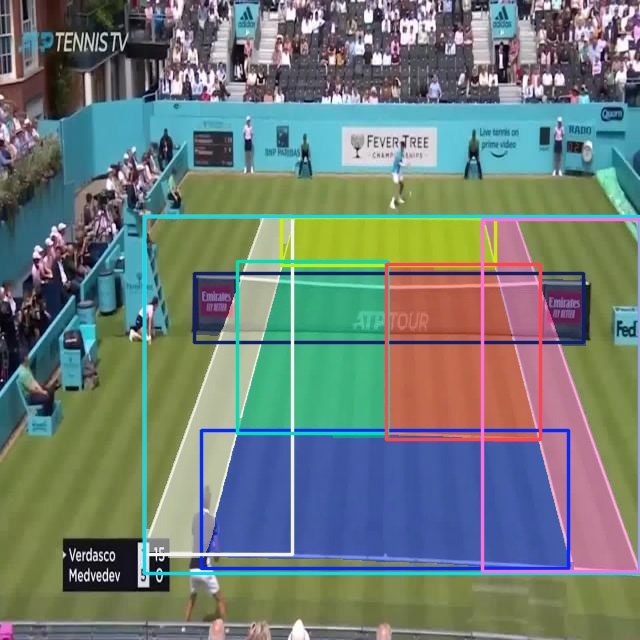

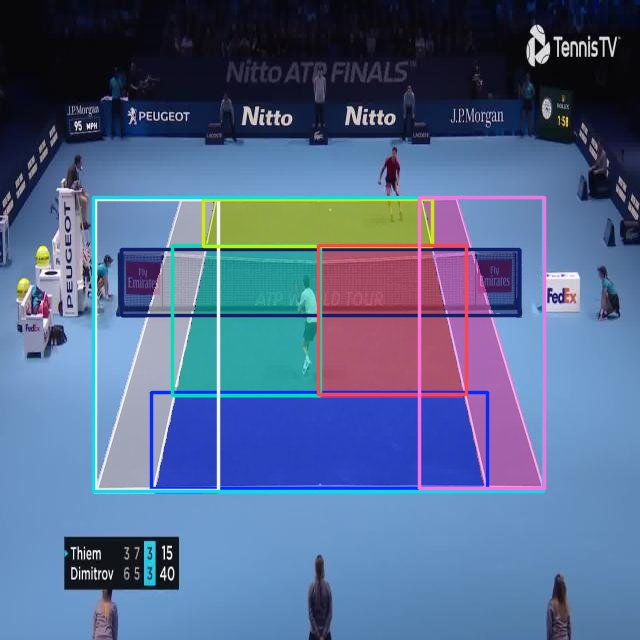

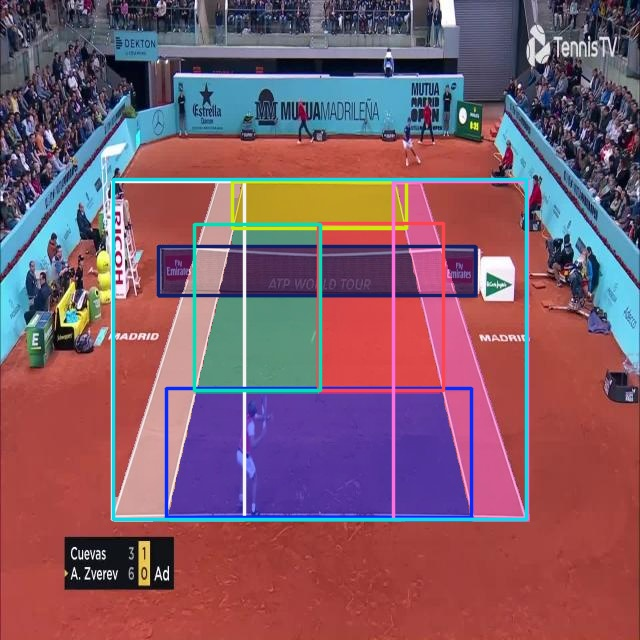

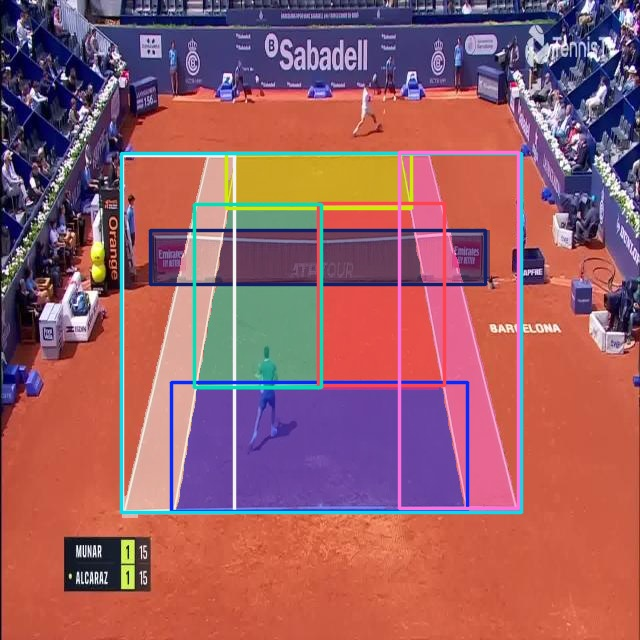

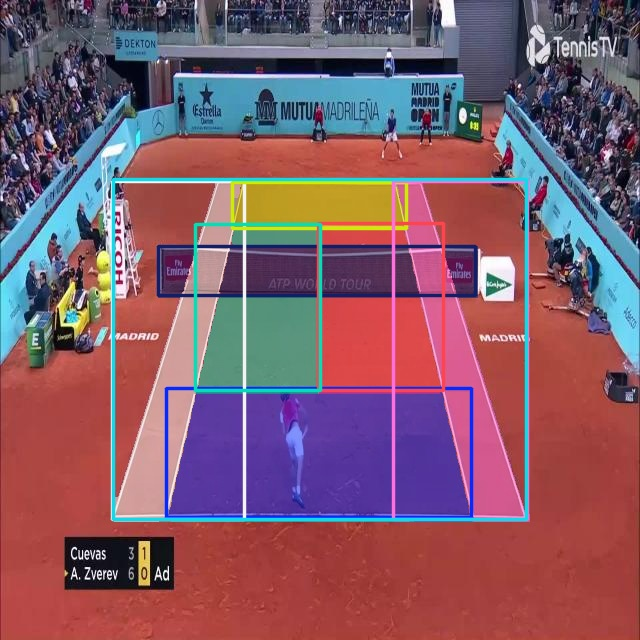

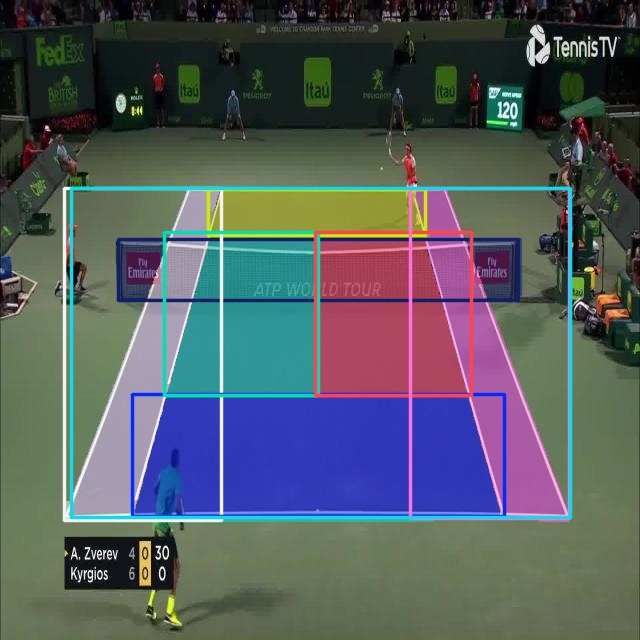

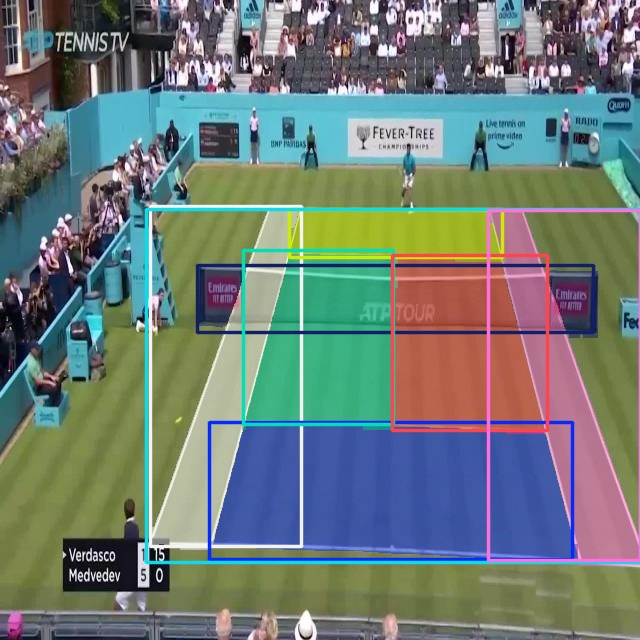

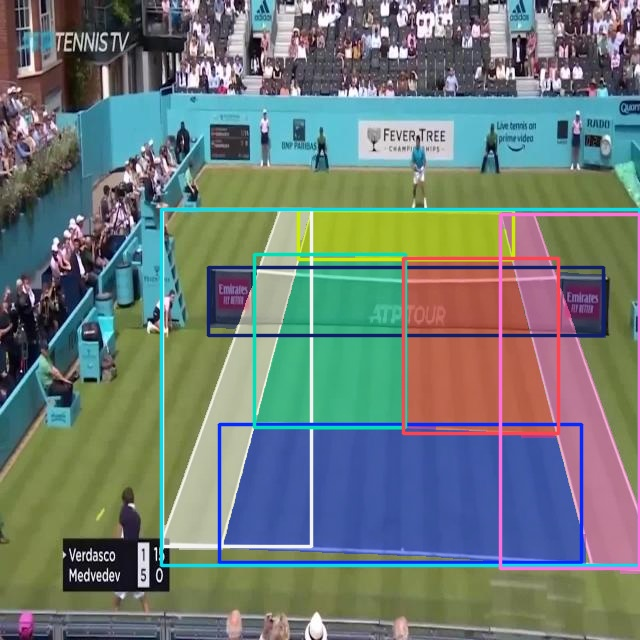

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:]:
    display(Image(filename=image_path, height=600))
    print("\n")